**references:**

\[1\] 王文韬. 合作质量投资情形下商品三重竞争均衡与协调策略研究\[D\].湖南大学,2018.

> piperliu@qq.com

> bilibili: Piper_佳鸽

> WeiXin: Piper蛋窝

\[1\]的第20页，两个制造商，一个供应商，顾客对产品 i 的需求函数可以表达为：

$$D_i(p,q,s) = \epsilon_i \alpha - b_1 p_i + \beta_1 p_j + b_2 q_i - \beta_2 q_j + b_3 s_i - \beta_3 s_j, \quad i, j = 1,2$$

\[1\]的第21页，该供应链在集中决策策略下的总利润：

$$\Pi_{SC} = \sum^2_{i=1} [(p_i - c_i)D_i - \frac{\mu_i q_i^2}{2} - \frac{\theta_i s^2_i}{2}]$$

**下面求其均衡状态的定价及质量水平：**

In [4]:
import sympy as sp

sp.init_printing()

# 声明变量
epsilon_1, epsilon_2, alpha = sp.symbols('epsilon_1, epsilon_2, alpha')
b_1, b_2, b_3, beta_1, beta_2, beta_3 = sp.symbols('b_1, b_2, b_3, beta_1, beta_2, beta_3')
p_1, p_2, c_1, c_2, mu_1, mu_2 = sp.symbols('p_1, p_2, c_1, c_2, mu_1, mu_2')
q_1, q_2, theta_1, theta_2, s_1, s_2 = sp.symbols('q_1, q_2, theta_1, theta_2, s_1, s_2')
D_1, D_2 = sp.symbols('D_1, D_2')

In [10]:
# 写公式
D_1 = epsilon_1 * alpha - b_1 * p_1 + beta_1 * p_2 + b_2 * q_1 - beta_2 * q_2 + b_3 * s_1 - beta_3 * s_2
D_2 = epsilon_1 * alpha - b_1 * p_2 + beta_1 * p_1 + b_2 * q_2 - beta_2 * q_1 + b_3 * s_2 - beta_3 * s_1

Pi_SC = (p_1 - c_1) * D_1 - mu_1 * q_1 ** 2 / 2 - theta_1 * s_1 ** 2 / 2 + (p_2 - c_2) * D_2 - mu_2 * q_2 ** 2 / 2 - theta_2 * s_2 ** 2 / 2

In [11]:
Pi_SC

In [15]:
hessian = list()

pq_list = [p_1, p_2, q_1, q_2]
for i in range(4):
    sub_hessian = list()
    for j in range(4):
        diff_1 = sp.diff(Pi_SC, pq_list[i])
        diff_2 = sp.diff(diff_1, pq_list[j])
        sub_hessian.append(diff_2)
    hessian.append(sub_hessian)
hessian

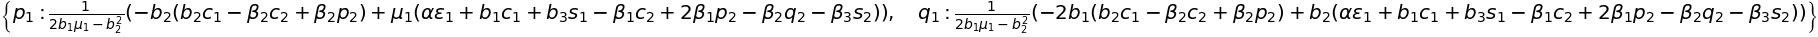

In [16]:
# 解方程组
eq_1 = sp.diff(Pi_SC, p_1)
eq_2 = sp.diff(Pi_SC, q_1)

sp.solve([eq_1, eq_2], [p_1, q_1])

In [17]:
sp.latex(Pi_SC)

'- \\frac{\\mu_{1} q_{1}^{2}}{2} - \\frac{\\mu_{2} q_{2}^{2}}{2} - \\frac{s_{1}^{2} \\theta_{1}}{2} - \\frac{s_{2}^{2} \\theta_{2}}{2} + \\left(- c_{1} + p_{1}\\right) \\left(\\alpha \\epsilon_{1} - b_{1} p_{1} + b_{2} q_{1} + b_{3} s_{1} + \\beta_{1} p_{2} - \\beta_{2} q_{2} - \\beta_{3} s_{2}\\right) + \\left(- c_{2} + p_{2}\\right) \\left(\\alpha \\epsilon_{1} - b_{1} p_{2} + b_{2} q_{2} + b_{3} s_{2} + \\beta_{1} p_{1} - \\beta_{2} q_{1} - \\beta_{3} s_{1}\\right)'

In [18]:
import re
def printWOSUOWEI(symbols):
    str_ = sp.latex(symbols)
    str_ = re.sub(r'\$', r'\\', str_)
    print(str_)

In [19]:
printWOSUOWEI(Pi_SC)

- \frac{\mu_{1} q_{1}^{2}}{2} - \frac{\mu_{2} q_{2}^{2}}{2} - \frac{s_{1}^{2} \theta_{1}}{2} - \frac{s_{2}^{2} \theta_{2}}{2} + \left(- c_{1} + p_{1}\right) \left(\alpha \epsilon_{1} - b_{1} p_{1} + b_{2} q_{1} + b_{3} s_{1} + \beta_{1} p_{2} - \beta_{2} q_{2} - \beta_{3} s_{2}\right) + \left(- c_{2} + p_{2}\right) \left(\alpha \epsilon_{1} - b_{1} p_{2} + b_{2} q_{2} + b_{3} s_{2} + \beta_{1} p_{1} - \beta_{2} q_{1} - \beta_{3} s_{1}\right)
